## all imports

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

## cleaning data

In [4]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
print(concrete_data.head())
concrete_data.shape

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  


(1030, 9)

In [5]:
#looking for nulls
print(concrete_data.describe())
concrete_data.isnull().sum()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000      

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

## splitting into train and test sets

In [8]:
predictors = concrete_data.drop("Strength", axis=1)
target = concrete_data['Strength']
predictors.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [13]:
n_cols = predictors.shape[1] # number of predictors, used later

In [60]:
 x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=42)

# neural networks
## part a - no normalisation, epochs=50, 1 hidden layer

In [61]:
#set up regression model
def regression_model_a():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape = (n_cols,)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [30]:
#fitting training data in model
model = regression_model_a()

model.fit(x_train, y_train, validation_split=0.3, epochs=50, verbose=1)

Epoch 1/50
16/16 [==============================] - 0s 13ms/step - loss: 41560.6055 - val_loss: 27717.1016
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 19965.2676 - val_loss: 12520.4355
Epoch 3/50
 1/16 [>.............................] - ETA: 0s - loss: 13502.42716/16 [==============================] - 0s 7ms/step - loss: 8913.7314 - val_loss: 5356.8936
Epoch 4/50
16/16 [==============================] - 0s 10ms/step - loss: 3988.6658 - val_loss: 2465.3525
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 2073.3433 - val_loss: 1456.1981
Epoch 6/50
16/16 [==============================] - 0s 12ms/step - loss: 1458.6697 - val_loss: 1136.0483
Epoch 7/50
16/16 [==============================] - 0s 11ms/step - loss: 1267.0276 - val_loss: 1042.7192
Epoch 8/50
16/16 [==============================] - 0s 13ms/step - loss: 1213.7168 - val_loss: 1003.6227
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 1182.1145 - val_loss:

In [31]:
#generating predicted data and evauating against test data
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred)

238.03893679667095

### repeat 50 times

In [62]:
#running model 50 times in loop
mse_list = []

for n in range(0,50):
    model = regression_model_a()

    model.fit(x_train, y_train, validation_split=0.3, epochs=50, verbose=0)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(" model {} mse: {}".format(n+1, mse))
    mse_list.append(mse)

    n += 1

#recording mean/std dev of all mean standard error for comparison
meana = np.mean(mse_list)
stda = np.std(mse_list) 

print("----------------results----------------")
print("part a: no normalisation, epochs=50, 1 hidden layer")
print("mean of mean squared errors: " + str(meana.round(2)))
print("standard deviation of mean squared errors: " + str(stda.round(2)))

model 1 mse: 267.3590469688935
 model 2 mse: 117.59382441780846
 model 3 mse: 207.3029126473804
 model 4 mse: 154.81513207495914
 model 5 mse: 430.06838053137983
 model 6 mse: 114.69750147886174
 model 7 mse: 909.8425690104128
 model 8 mse: 140.81265153453413
 model 9 mse: 416.2653895120423
 model 10 mse: 179.4224446269846
 model 11 mse: 77.5264135943781
 model 12 mse: 206.7048697120989
 model 13 mse: 210.26969431155777
 model 14 mse: 251.34728117643158
 model 15 mse: 118.88235764266172
 model 16 mse: 143.10803459468903
 model 17 mse: 310.32083751139
 model 18 mse: 705.3444431854691
 model 19 mse: 591.4139933826667
 model 20 mse: 4856.03971408804
 model 21 mse: 2776.539713072398
 model 22 mse: 161.5475682001624
 model 23 mse: 879.7018002671344
 model 24 mse: 145.42317908265332
 model 25 mse: 1198.0123941108734
 model 26 mse: 314.4291884678185
 model 27 mse: 130.38159731814352
 model 28 mse: 370.0222238745393
 model 29 mse: 132.40419847728623
 model 30 mse: 423.5362323591803
 model 31 m

## part b - normalisation, epochs=50, 1 hidden layer

In [63]:
#normalising data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [64]:
#splitting normalised data into train and test
x_train, x_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.30, random_state=42)

In [65]:
#same model used in parts b and c
def regression_model_bc():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape = (n_cols,)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [66]:
mse_list = []

for n in range(0,50):
    model = regression_model_bc()

    model.fit(x_train, y_train, validation_split=0.3, epochs=50, verbose=0)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(" model {} mse: {}".format(n+1, mse))
    mse_list.append(mse)

    n += 1

meanb = np.mean(mse_list)
stdb = np.std(mse_list) 

print("----------------results----------------")
print("part a: no normalisation, epochs=50, 1 hidden layer")
print("mean of mean squared errors: " + str(meanb.round(2)))
print("standard deviation of mean squared errors: " + str(stdb.round(2)))

model 1 mse: 906.7511735288045
 model 2 mse: 574.850992352977
 model 3 mse: 565.814811433985
 model 4 mse: 713.7902075594742
 model 5 mse: 718.2938798179813
 model 6 mse: 545.6497141495245
 model 7 mse: 629.9232374395327
 model 8 mse: 708.1565293608986
 model 9 mse: 588.1044289248077
 model 10 mse: 755.1023243152036
 model 11 mse: 552.6275428093392
 model 12 mse: 746.0825129352987
 model 13 mse: 607.9209647985164
 model 14 mse: 878.2109647401453
 model 15 mse: 778.2911225277844
 model 16 mse: 653.4360638841605
 model 17 mse: 661.9233631662245
 model 18 mse: 724.5757260180119
 model 19 mse: 545.2269533170555
 model 20 mse: 665.052760503656
 model 21 mse: 645.267724640143
 model 22 mse: 425.329430295632
 model 23 mse: 544.8423368554509
 model 24 mse: 636.1471836983097
 model 25 mse: 602.9370266472871
 model 26 mse: 568.1199185365307
 model 27 mse: 667.6278503862194
 model 28 mse: 763.193048928751
 model 29 mse: 687.1817297299076
 model 30 mse: 702.0021810862286
 model 31 mse: 424.7281807

## part c - normalisation, epochs=100, 1 hidden layer

In [67]:
def regression_model_c():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape = (n_cols,)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [68]:
mse_list = []

for n in range(0,50):
    model = regression_model_c()

    model.fit(x_train, y_train, validation_split=0.3, epochs=100, verbose=0)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(" model {} mse: {}".format(n+1, mse))
    mse_list.append(mse)

    n += 1

meanc = np.mean(mse_list)
stdc = np.std(mse_list) 

print("part a: no normalisation, epochs=100, 1 hidden layer")
print("mean of mean squared errors: " + str(meanc.round(2)))
print("standard deviation of mean squared errors: " + str(stdc.round(2)))

model 1 mse: 222.56991273778868
 model 2 mse: 160.8060409339499
 model 3 mse: 177.81528696467947
 model 4 mse: 188.5203326661364
 model 5 mse: 194.1467985692477
 model 6 mse: 409.5534017284044
 model 7 mse: 171.06635804615237
 model 8 mse: 203.50640441878136
 model 9 mse: 195.22103524518755
 model 10 mse: 185.24385220024695
 model 11 mse: 301.65702449643385
 model 12 mse: 201.84893930471833
 model 13 mse: 177.96458640710577
 model 14 mse: 272.477696909636
 model 15 mse: 194.57406036918798
 model 16 mse: 214.78623597895742
 model 17 mse: 185.06566421447246
 model 18 mse: 186.50541654813335
 model 19 mse: 167.08371085856172
 model 20 mse: 231.58793143097014
 model 21 mse: 211.4585661210806
 model 22 mse: 234.59401503500803
 model 23 mse: 172.7715862012643
 model 24 mse: 202.4778396924331
 model 25 mse: 176.91213178024114
 model 26 mse: 193.8546983420105
 model 27 mse: 183.29379601443216
 model 28 mse: 284.6956236470539
 model 29 mse: 171.52077523804343
 model 30 mse: 307.29765169436394
 

## part d - normalisation, epoch=50, 3 hidden layers

In [69]:
def regression_model_d():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape = (n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [70]:
mse_list = []

for n in range(0,50):
    model = regression_model_d()

    model.fit(x_train, y_train, validation_split=0.3, epochs=50, verbose=0)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(" model {} mse: {}".format(n+1, mse))
    mse_list.append(mse)

    n += 1

meand = np.mean(mse_list)
stdd = np.std(mse_list) 

print("part a: no normalisation, epochs=100, 1 hidden layer")
print("mean of mean squared errors: " + str(meand.round(2)))
print("standard deviation of mean squared errors: " + str(stdd.round(2)))

model 1 mse: 132.00156170943674
 model 2 mse: 124.65698359851451
 model 3 mse: 139.08557867915286
 model 4 mse: 135.36839113343842
 model 5 mse: 123.16951138623652
 model 6 mse: 146.32011693810242
 model 7 mse: 157.2520026652249
 model 8 mse: 135.24945803598843
 model 9 mse: 123.68071354792268
 model 10 mse: 145.96771044755428
 model 11 mse: 149.90905555276402
 model 12 mse: 140.1595313198456
 model 13 mse: 140.18275604084178
 model 14 mse: 138.74792201649072
 model 15 mse: 145.97710132934188
 model 16 mse: 149.98489416256365
 model 17 mse: 140.91229849038632
 model 18 mse: 116.4179062298598
 model 19 mse: 136.86335354208
 model 20 mse: 151.22517822412166
 model 21 mse: 114.28389689985498
 model 22 mse: 144.24845186485268
 model 23 mse: 137.15603432920352
 model 24 mse: 142.63518710870477
 model 25 mse: 130.50181469674297
 model 26 mse: 147.00470238876048
 model 27 mse: 137.3455663760419
 model 28 mse: 141.5871629085625
 model 29 mse: 148.919840220235
 model 30 mse: 148.46771112842276


## compare neural networks

In [78]:
#adding all means/std devs into single dataframe for comparisons 
compare = pd.DataFrame(data={'mean': [meana, meanb, meanc, meand], 'stdev': [stda, stdb, stdc, stdd]})
compare.rename(index={0:'a',1:'b',2:'c',3:'d'}, inplace=True)
compare

,mean,stdev
a,504.522063,785.220376
b,666.193195,124.511883
c,211.513279,46.435448
d,137.888677,11.772866


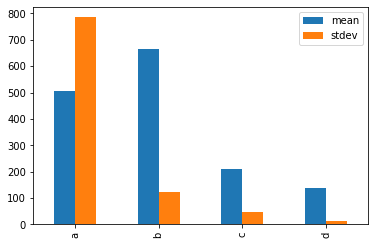

In [81]:
#plotting comparisons
compare[['mean','stdev']].plot(kind='bar')
plt.show()